In [84]:
import pandas as pd

In [85]:
#importing iris data with pandas
df = pd.read_csv("iris.data", header = None)

In [86]:
df.columns = ['sepal length','sepal width', 'petal length', 'petal width', 'class']

In [87]:
df.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [88]:
df.dropna(inplace = True)

In [89]:
#removing class column
df.drop('class', axis = 1, inplace = True)

In [90]:
df.head()

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [91]:
#scaling the dataset
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
scaled_df = ss.fit_transform(df)
df = pd.DataFrame(scaled_df, columns = df.columns)

In [92]:
df.head()

,sepal length,sepal width,petal length,petal width
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977


In [93]:
#using "elbow method" to find best value for k
#wcss is list of the sum of squared distance in each cluster

from sklearn.cluster import KMeans
wcss = []
clusters = []

for k in range (1,10):
    kmeans = KMeans(n_clusters= k, random_state= 0)
    kmeans.fit_predict(df)
    wcss.append(kmeans.inertia_)    
    clusters.append(k)

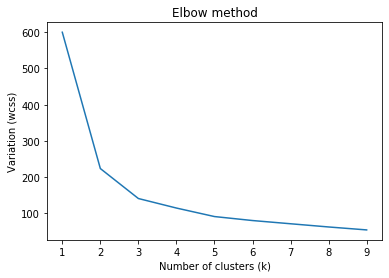

In [94]:
#plotting the result to identify the elbow
import matplotlib.pyplot as plt
plt.plot(clusters, wcss)
plt.xlabel('Number of clusters (k)')
plt.ylabel('Variation (wcss)')
plt.title('Elbow method')
plt.show()

In [95]:
#applying kmeans to dataset
kmeans = KMeans(n_clusters= 3, random_state= 0)
final_kmeans = kmeans.fit_predict(df)

In [96]:
print(final_kmeans)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 0 0 0 2 0 0 0 0 0 0 0 0 2 0 0 0 0 2 0 0 0
 0 2 2 2 0 0 0 0 0 0 0 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 2 2 2 2 2 2 0 0 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]
